In [19]:
#Download the data set from here ==> 'https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv'

# Uploading the dataset

import numpy as np
import pandas as pd 

df = pd.read_csv('IMDB Dataset.csv',sep = ',')

df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [20]:
#looking for any null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [21]:
import tensorflow as tf

In [22]:
print(tf.__version__)

2.15.0


In [23]:
# We can see there are total of 50000 reviews, out of which positive and negative are equally 50% split
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [24]:
df['sentiment_new'] = np.where(df['sentiment'] == 'positive',1,0)

df.drop('sentiment',axis = 1, inplace = True)

df['sentiment_new'].value_counts()

sentiment_new
1    25000
0    25000
Name: count, dtype: int64

In [40]:
# Importing necessary libraries 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

(-0.5, 1199.5, 799.5, -0.5)

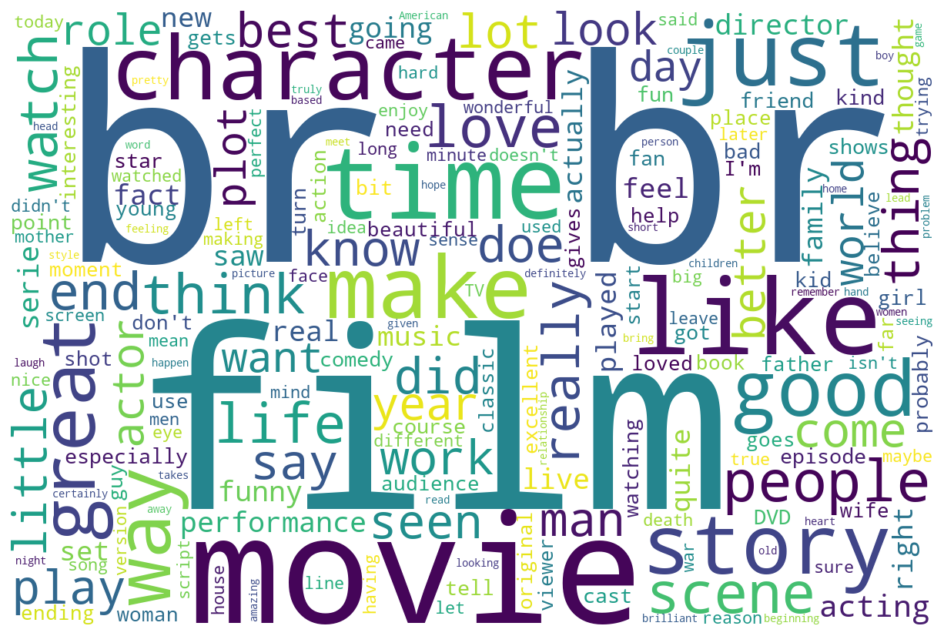

In [8]:
# Word cloud for all the Negative sentiment reviews

text= ""

def get_all_text(t):
    global text
    text = text+t+" "
    
df.review[df.sentiment_new == 1].apply(get_all_text)

wordcloud = WordCloud(
    width= 1200,
    height= 800,
    stopwords= ENGLISH_STOP_WORDS,
    background_color= 'white'
).generate(text)

plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

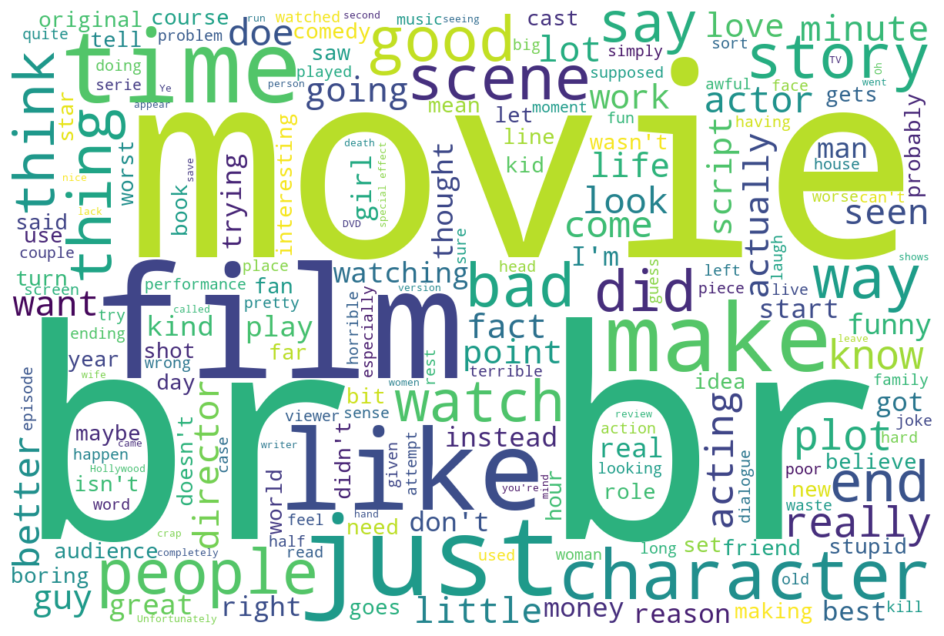

In [9]:
# Word cloud for all the Positive sentiment reviews

text= ""

def get_all_text(t):
    global text
    text = text+t+" "
    
df.review[df.sentiment_new == 0].apply(get_all_text)

wordcloud = WordCloud(
    width= 1200,
    height= 800,
    stopwords= ENGLISH_STOP_WORDS,
    background_color= 'white'
).generate(text)

plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')

by simply looking at wordclouds we can't distinguish between positive and negative wordclouds, hence it proves high frequency words does not have any influence on positive or negative review 

In [360]:
#Getting independent variables
reviews = df.copy()

X = reviews.drop('sentiment_new',axis = 1)

#Getting dependent variables

y = reviews.drop('review',axis = 1)

print(X.head())
print(X.shape)

print() 

print(y.head())
print(y.shape)


                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...
(50000, 1)

   sentiment_new
0              1
1              1
2              1
3              0
4              1
(50000, 1)


In [361]:
# Storing indenpendent variable 
reviews = X.copy()

reviews['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [28]:
# Importing libraries 
import nltk 
import re
from nltk.corpus import stopwords #Library for stopwords 
nltk.download('stopwords')

In [30]:
reviews['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [31]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ## stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(reviews)):
    reviewed = re.sub('[^a-zA-Z]', ' ', reviews['review'][i]) # removing all puntuations non alphabets  
    reviewed = reviewed.lower() # lowering all words to lowercases  
    reviewed = reviewed.split()
    
    reviewed = [ps.stem(word) for word in reviewed if not word in stopwords.words('english')] # removing stop words
    reviewed = ' '.join(reviewed)
    corpus.append(reviewed)

In [362]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [363]:
### TFIDF Technique
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(use_idf = True, norm= 'l2', ngram_range=(1,1),max_features = 2500) 
#max_features= it will only pick top 2500 high freq words 
X=cv.fit_transform(corpus).toarray()

In [364]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33500, 2500)
(16500, 2500)
(33500, 1)
(16500, 1)


## Implementating Machine Learning Techniques

In [365]:
# Naive bayes model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

movie_review_model = MultinomialNB().fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [366]:
#prediction
y_pred = movie_review_model.predict(X_test)

y_pred=np.where(y_pred > 0.5, 1,0) # you can plot ROC curve to decide the cutoff 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

score=accuracy_score(y_test,y_pred)
print(score)

from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

[[6877 1404]
 [1126 7093]]
0.8466666666666667
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      8003
           1       0.86      0.83      0.85      8497

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



In [367]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Hyperparameter for MultinomialNB
}

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new model with the best parameters
best_model = MultinomialNB(alpha=best_params['alpha'])
best_model.fit(X_train, y_train)

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Best Score (Cross-Validation Accuracy):", best_score)
print("Test Accuracy:", accuracy)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters: {'alpha': 2.0}
Best Score (Cross-Validation Accuracy): 0.8475820895522389
Test Accuracy: 0.8473939393939394


Navie bayes giving us decent results, if i increase max features more than 2500 there is very mariginal improvement in the accuracy. Also, model is not performing well with the the introduction of ngrams. Precision, Recall & F1 - score are similar which indicates that classifier is good at predicting and understanding the classes.    

In [368]:
# Logistic regression 
from sklearn.linear_model import LogisticRegressionCV

# Logistic regression with cross-validation
LM_model = LogisticRegressionCV(
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Evaluate based on accuracy
    max_iter=300,             # Maximum number of iterations for optimization
    n_jobs=-1,                # Use all available CPU cores for parallel computation
    verbose=3,                # Show detailed output
    random_state=0            # Random seed for reproducibility
)

LM_model.fit(X_train,y_train)

score=accuracy_score(y_test,y_pred)
print(score)

pred = LM_model.predict(X_test)
print(classification_report(pred,y_test))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished


0.8466666666666667
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8071
           1       0.89      0.87      0.88      8429

    accuracy                           0.88     16500
   macro avg       0.88      0.88      0.88     16500
weighted avg       0.88      0.88      0.88     16500



Logistic regression gave better precision and recall than Navie bayes and has same accuracy

In [369]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 200, n_jobs= -1, verbose= 1)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

score=accuracy_score(y_test,y_pred)
print(score)

print(classification_report(pred, y_test))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


0.8466666666666667
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8265
           1       0.85      0.85      0.85      8235

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.3s finished


Random Forest has same accuracy as both logistic and Naive bayes. but when it comes to precision, recall and F1 -score it performes better than Naive bayes

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.5s finished


Area under the curve - Logistic:  0.9512361158921193
Area under the curve - RandomForest:  0.9256385607148848
Area under the curve - Support Vector:  0.923981516198157


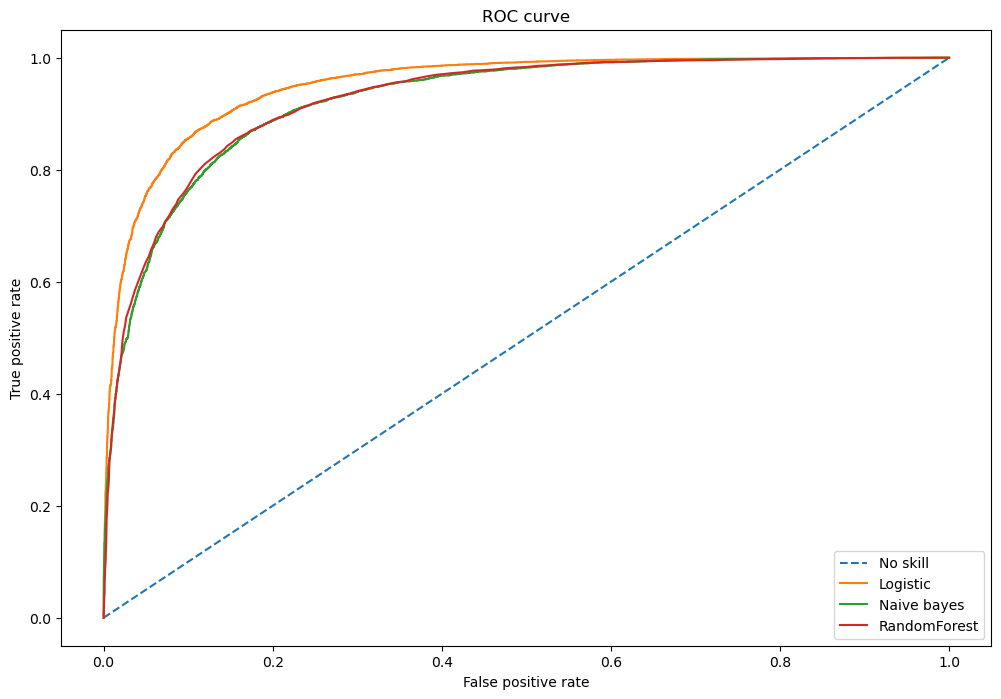

In [370]:
from sklearn.metrics import roc_auc_score, roc_curve

no_skill_probs = [0 for _ in range(len(y_test))]
lrmod_probs = LM_model.predict_proba(X_test)[:,1]
rfmod_probs = rf_model.predict_proba(X_test)[:,1]
NBmod_probs = movie_review_model.predict_proba(X_test)[:,1]

roc_score_lr = roc_auc_score(y_test, lrmod_probs)
roc_score_rf = roc_auc_score(y_test, rfmod_probs)
roc_score_NB = roc_auc_score(y_test, NBmod_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_probs)
lrmod_fpr, lrmod_tpr, _ = roc_curve(y_test, lrmod_probs)
rfmod_fpr, rfmod_tpr, _ = roc_curve(y_test, rfmod_probs)
NBmod_fpr, NBmod_tpr, _ = roc_curve(y_test, NBmod_probs)

print("Area under the curve - Logistic: ",roc_score_lr)
print("Area under the curve - RandomForest: ",roc_score_rf)
print("Area under the curve - Support Vector: ",roc_score_NB)

plt.figure(figsize= (12,8))
plt.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'No skill')
plt.plot(lrmod_fpr, lrmod_tpr, label= 'Logistic')
plt.plot(NBmod_fpr, NBmod_tpr, label= 'Naive bayes')
plt.plot(rfmod_fpr, rfmod_tpr, label= 'RandomForest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc= 'lower right')

From above we can say Logistic regression performs better than both Navie bayes and Random forest as it has more area under the curve  

## Implementing Deep learning Techniques 

In [165]:
# Create a backup for the corpus 

#corpus_backup = corpus.copy()

corpus = corpus_backup.copy()

corpus_df = pd.DataFrame({'Sentences': corpus})

# Add a column with the lengths of sentences
corpus_df['Sentence Length'] = [len(sentence.split()) for sentence in corpus_df['Sentences']]

corpus_df = pd.concat([corpus_df,df['sentiment_new']],axis = 1)

# Display the DataFrame
print(corpus_df)



                                               Sentences  Sentence Length  \
0      one review mention watch oz episod hook right ...              168   
1      wonder littl product br br film techniqu unass...               92   
2      thought wonder way spend time hot summer weeke...               88   
3      basic famili littl boy jake think zombi closet...               70   
4      petter mattei love time money visual stun film...              133   
...                                                  ...              ...   
49995  thought movi right good job creativ origin fir...               81   
49996  bad plot bad dialogu bad act idiot direct anno...               61   
49997  cathol taught parochi elementari school nun ta...              117   
49998  go disagre previou comment side maltin one sec...              112   
49999  one expect star trek movi high art fan expect ...               68   

       sentiment_new  
0                  1  
1                  1  
2     

## OHE

In [167]:
# Vocabulary size 

voc_size= 20000 #count_unique_words


In [168]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[11988,
  8951,
  19433,
  799,
  11870,
  9191,
  2618,
  5201,
  14051,
  9036,
  18624,
  18624,
  92,
  5673,
  8374,
  11870,
  894,
  11846,
  15729,
  18667,
  6087,
  5201,
  5187,
  14923,
  867,
  786,
  186,
  6449,
  5653,
  786,
  13796,
  10786,
  13030,
  15573,
  16918,
  18667,
  17983,
  17509,
  8958,
  5187,
  18624,
  18624,
  16755,
  11870,
  16754,
  5815,
  1022,
  454,
  13664,
  14020,
  14014,
  13626,
  3932,
  1192,
  10460,
  4826,
  4493,
  11449,
  17966,
  12471,
  14405,
  4197,
  13921,
  939,
  2888,
  16916,
  8973,
  10460,
  12305,
  12377,
  868,
  1102,
  17747,
  5108,
  843,
  12373,
  18927,
  15884,
  12710,
  6070,
  149,
  15638,
  1064,
  784,
  17429,
  5186,
  15334,
  18624,
  18624,
  615,
  11488,
  17387,
  17788,
  786,
  7792,
  14312,
  920,
  786,
  11307,
  7752,
  5768,
  14991,
  983,
  19020,
  3464,
  7752,
  6732,
  7752,
  19119,
  11870,
  6530,
  13163,
  92,
  9191,
  1529,
  4523,
  8374,
  12865,
  7199,
  11488,
 

In [242]:
# Redefining dependent variables

y = corpus_df.drop(['Sentences','Sentence Length'],axis = 1)

y

,sentiment_new
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


### Embedding Representation

In [243]:
sent_length = 150 #max(len(i) for i in onehot_repr) 
print(sent_length)
embedded_docs = pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

150
[[15729 18667  6087 ... 11250 18603  8724]
 [ 8481  1594 14406 ...     0     0     0]
 [ 5394  8481  9677 ...     0     0     0]
 ...
 [ 4487 16282  7364 ...     0     0     0]
 [14923 12558 16689 ...     0     0     0]
 [11988 14897 12815 ...     0     0     0]]


In [244]:
embedded_docs.shape

(50000, 150)

In [245]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [246]:
onehot_repr[0]

[11988,
 8951,
 19433,
 799,
 11870,
 9191,
 2618,
 5201,
 14051,
 9036,
 18624,
 18624,
 92,
 5673,
 8374,
 11870,
 894,
 11846,
 15729,
 18667,
 6087,
 5201,
 5187,
 14923,
 867,
 786,
 186,
 6449,
 5653,
 786,
 13796,
 10786,
 13030,
 15573,
 16918,
 18667,
 17983,
 17509,
 8958,
 5187,
 18624,
 18624,
 16755,
 11870,
 16754,
 5815,
 1022,
 454,
 13664,
 14020,
 14014,
 13626,
 3932,
 1192,
 10460,
 4826,
 4493,
 11449,
 17966,
 12471,
 14405,
 4197,
 13921,
 939,
 2888,
 16916,
 8973,
 10460,
 12305,
 12377,
 868,
 1102,
 17747,
 5108,
 843,
 12373,
 18927,
 15884,
 12710,
 6070,
 149,
 15638,
 1064,
 784,
 17429,
 5186,
 15334,
 18624,
 18624,
 615,
 11488,
 17387,
 17788,
 786,
 7792,
 14312,
 920,
 786,
 11307,
 7752,
 5768,
 14991,
 983,
 19020,
 3464,
 7752,
 6732,
 7752,
 19119,
 11870,
 6530,
 13163,
 92,
 9191,
 1529,
 4523,
 8374,
 12865,
 7199,
 11488,
 15960,
 799,
 16540,
 8661,
 11870,
 3608,
 14213,
 2888,
 13937,
 6182,
 18667,
 18667,
 1608,
 17485,
 10481,
 11395,


## LSTM

In [247]:
## Creating model
embedding_vector_features=40 ##features representation ##Hyperparameters #every word will be represneted by 40 different features 
            
LSTM_model=Sequential()
LSTM_model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length)) ##Embedding layer 
LSTM_model.add(LSTM(100)) #NO of neurons # hyperparamter
LSTM_model.add(Dense(1,activation='sigmoid'))
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(LSTM_model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 150, 40)           800000    
                                                                 
 lstm_8 (LSTM)               (None, 100)               56400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 856501 (3.27 MB)
Trainable params: 856501 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [248]:
len(embedded_docs),y.shape

(50000, (50000, 1))

In [249]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [250]:
X_final.shape,y_final.shape

((50000, 150), (50000, 1))

In [251]:
X_final[0]

array([15729, 18667,  6087,  5201,  5187, 14923,   867,   786,   186,
        6449,  5653,   786, 13796, 10786, 13030, 15573, 16918, 18667,
       17983, 17509,  8958,  5187, 18624, 18624, 16755, 11870, 16754,
        5815,  1022,   454, 13664, 14020, 14014, 13626,  3932,  1192,
       10460,  4826,  4493, 11449, 17966, 12471, 14405,  4197, 13921,
         939,  2888, 16916,  8973, 10460, 12305, 12377,   868,  1102,
       17747,  5108,   843, 12373, 18927, 15884, 12710,  6070,   149,
       15638,  1064,   784, 17429,  5186, 15334, 18624, 18624,   615,
       11488, 17387, 17788,   786,  7792, 14312,   920,   786, 11307,
        7752,  5768, 14991,   983, 19020,  3464,  7752,  6732,  7752,
       19119, 11870,  6530, 13163,    92,  9191,  1529,  4523,  8374,
       12865,  7199, 11488, 15960,   799, 16540,  8661, 11870,  3608,
       14213,  2888, 13937,  6182, 18667, 18667,  1608, 17485, 10481,
       11395, 13259,  1114,  9168,  8092,   625, 15334,  9131, 13406,
        7586, 18933,

In [252]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [254]:
print(X_train.shape)
print()
print(X_test.shape)
print()
print(y_train.shape)
print()
print(y_test.shape)

(33500, 150)

(16500, 150)

(33500, 1)

(16500, 1)


### Model Training

In [255]:
### Finally Training

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)


LSTM_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64, callbacks = early_stopping)

Epoch 1/10
524/524 [==============================] - 113s 211ms/step - loss: 0.6614 - accuracy: 0.5923 - val_loss: 0.6574 - val_accuracy: 0.6251
Epoch 2/10
524/524 [==============================] - 109s 209ms/step - loss: 0.6206 - accuracy: 0.6608 - val_loss: 0.5735 - val_accuracy: 0.6821
Epoch 3/10
524/524 [==============================] - 97s 185ms/step - loss: 0.6229 - accuracy: 0.6263 - val_loss: 0.5699 - val_accuracy: 0.7371
Epoch 4/10
524/524 [==============================] - 92s 175ms/step - loss: 0.6148 - accuracy: 0.6480 - val_loss: 0.6861 - val_accuracy: 0.5319
Epoch 5/10
524/524 [==============================] - 87s 166ms/step - loss: 0.5534 - accuracy: 0.6887 - val_loss: 0.4635 - val_accuracy: 0.8153
Epoch 6/10
524/524 [==============================] - 1566s 3s/step - loss: 0.5310 - accuracy: 0.7338 - val_loss: 0.6782 - val_accuracy: 0.5395
Epoch 7/10
524/524 [==============================] - 94s 179ms/step - loss: 0.5836 - accuracy: 0.6581 - val_loss: 0.5130 - val_a

### Performance Metrics And Accuracy

In [256]:
y_pred=LSTM_model.predict(X_test)

516/516 [==============================] - 9s 17ms/step


In [257]:
##if you do not want threshold of 0.5 use AUC ROC Curve
y_pred=np.where(y_pred > 0.5, 1,0) 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6829, 1379],
       [1668, 6624]], dtype=int64)

In [258]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8153333333333334

In [259]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      8208
           1       0.83      0.80      0.81      8292

    accuracy                           0.82     16500
   macro avg       0.82      0.82      0.82     16500
weighted avg       0.82      0.82      0.82     16500



## Bidirectional LSTM

In [270]:
## Creating model

from keras.layers import Bidirectional, LSTM

embedding_vector_features=40
Bi_LSTM_model=Sequential()
Bi_LSTM_model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
Bi_LSTM_model.add(Bidirectional(LSTM(200)))
Bi_LSTM_model.add(Dense(1,activation='sigmoid'))
Bi_LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(Bi_LSTM_model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 150, 40)           800000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 400)               385600    
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 1)                 401       
                                                                 
Total params: 1186001 (4.52 MB)
Trainable params: 1186001 (4.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Model training

In [273]:
### Finally Training

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)


Bi_LSTM_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64, callbacks = early_stopping)

Epoch 1/20
524/524 [==============================] - 202s 379ms/step - loss: 0.4718 - accuracy: 0.7773 - val_loss: 0.3692 - val_accuracy: 0.8437
Epoch 2/20
524/524 [==============================] - 191s 365ms/step - loss: 0.2806 - accuracy: 0.8929 - val_loss: 0.3121 - val_accuracy: 0.8708
Epoch 3/20
524/524 [==============================] - 206s 393ms/step - loss: 0.2090 - accuracy: 0.9244 - val_loss: 0.3169 - val_accuracy: 0.8748
Epoch 4/20
524/524 [==============================] - 192s 366ms/step - loss: 0.1623 - accuracy: 0.9415 - val_loss: 0.3836 - val_accuracy: 0.8682
Epoch 5/20
524/524 [==============================] - 171s 326ms/step - loss: 0.1166 - accuracy: 0.9607 - val_loss: 0.4182 - val_accuracy: 0.8670
Epoch 6/20
524/524 [==============================] - 168s 320ms/step - loss: 0.0940 - accuracy: 0.9678 - val_loss: 0.4620 - val_accuracy: 0.8594
Epoch 6: early stopping


### Performance Metrics And Accuracy


In [274]:
y_pred=Bi_LSTM_model.predict(X_test)

516/516 [==============================] - 27s 52ms/step


In [275]:
##if you do not want threshold  of 0.5 use AUC ROC Curve
y_pred=np.where(y_pred > 0.5, 1,0) 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7039, 1169],
       [ 963, 7329]], dtype=int64)

In [276]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8707878787878788

In [277]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8208
           1       0.86      0.88      0.87      8292

    accuracy                           0.87     16500
   macro avg       0.87      0.87      0.87     16500
weighted avg       0.87      0.87      0.87     16500



### Simple RNN

In [278]:
## Creating model
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

embedding_vector_features = 80
RNN_model = Sequential()
RNN_model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
RNN_model.add(SimpleRNN(200))  # SimpleRNN layer
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_model.summary())


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 150, 80)           1600000   
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 200)               56200     
                                                                 
 dense_17 (Dense)            (None, 1)                 201       
                                                                 
Total params: 1656401 (6.32 MB)
Trainable params: 1656401 (6.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Model training

In [279]:
### Finally Training

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)


RNN_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64, callbacks = early_stopping)

Epoch 1/20
524/524 [==============================] - 38s 71ms/step - loss: 0.6996 - accuracy: 0.4993 - val_loss: 0.6991 - val_accuracy: 0.4987
Epoch 2/20
524/524 [==============================] - 37s 71ms/step - loss: 0.6896 - accuracy: 0.5214 - val_loss: 0.6986 - val_accuracy: 0.5112
Epoch 3/20
524/524 [==============================] - 35s 68ms/step - loss: 0.6539 - accuracy: 0.5667 - val_loss: 0.7742 - val_accuracy: 0.5095
Epoch 4/20
524/524 [==============================] - 38s 72ms/step - loss: 0.6157 - accuracy: 0.5869 - val_loss: 0.7382 - val_accuracy: 0.5067
Epoch 4: early stopping


### Performance Metrics And Accuracy

In [280]:
y_pred=RNN_model.predict(X_test)

516/516 [==============================] - 6s 12ms/step


In [281]:
##if you do not want threshold  of 0.5 use AUC ROC Curve
y_pred=np.where(y_pred > 0.5, 1,0) 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[8189,   19],
       [8252,   40]], dtype=int64)

In [282]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.49872727272727274

In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      8208
           1       0.68      0.00      0.01      8292

    accuracy                           0.50     16500
   macro avg       0.59      0.50      0.34     16500
weighted avg       0.59      0.50      0.34     16500



    LSTM model has higher accuracy than any other Machine learning model 
    Bi - directional LSTM generated higher accuracy than LSTM and has best precision, recall & f1 - score
    Simple RNN was not able to performed well 

### Scoring the model with manually writing the reviews

In [359]:
def make_corpus(sentence):
    corpus_sentence = []
    for i in range(0, len(sentence)):
        reviewed = re.sub('[^a-zA-Z]', ' ', sentence) # removing all puntuations non alphabets  
        reviewed = reviewed.lower() # lowering all words to lowercases  
        reviewed = reviewed.split()

        reviewed = [ps.stem(word) for word in reviewed if not word in stopwords.words('english')] # removing stop words
        reviewed = ' '.join(reviewed)
        corpus_sentence.append(reviewed)
        return corpus_sentence

write_review = input(str('Write a review :    '))

corpus_sentence = make_corpus(write_review)

onehot_repr_corpus_sentence=[one_hot(words,voc_size)for words in corpus_sentence] 
onehot_repr_corpus_sentence

y_pred = Bi_LSTM_model.predict(onehot_repr_corpus_sentence)
y_pred=np.where(y_pred > 0.5, 1,0) 

if y_pred[0][0] == 1:
    print("Movie Review is positive")
    
else :
    print("Movie Review is Negative")

Write a review :    i really like the movie
1/1 [==============================] - 0s 40ms/step
Movie Review is positive
